In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
data = data.dropna()

In [5]:
label_encoders = {}
categorical_columns = ['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [6]:
X = data.drop(['Restaurant ID', 'Aggregate rating', 'Address', 'Longitude', 'Latitude'], axis=1)
y = data['Aggregate rating']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.058072289156626496
R-squared: 0.9746412783506991


In [13]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)

Feature Importance:
Votes                   0.900676
Rating color            0.084228
Rating text             0.004602
Restaurant Name         0.002577
Cuisines                0.002286
Average Cost for two    0.001569
Locality Verbose        0.001322
Locality                0.001104
City                    0.000921
Has Online delivery     0.000313
Price range             0.000219
Has Table booking       0.000076
Country Code            0.000062
Currency                0.000042
Is delivering now       0.000004
Switch to order menu    0.000000
dtype: float64


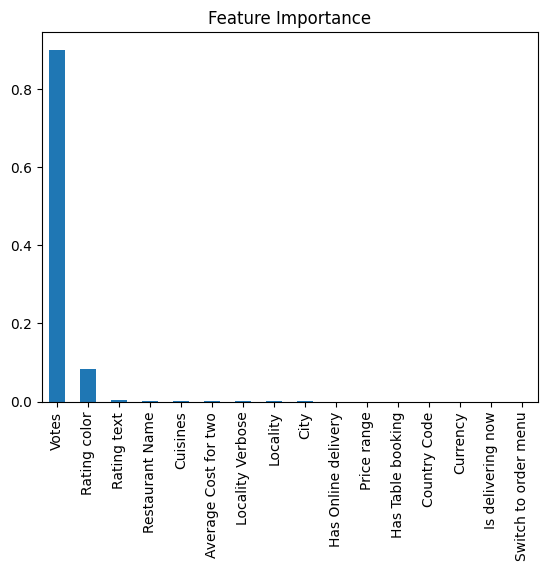

In [14]:
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()